# <font color='crimson'>Project: Mall customers Dataset</font>

## <font color='gray'>Table of Contents</font>
<ul>
<li><a href="#intro">1) Introduction + Data Wrangling</a></li>
<li><a href="#eda">2) Exploratory Data Analysis</a></li>
<li><a href="#conclusions">3) Conclusions</a></li>
</ul>

<a id='intro'></a>
## <font color='teal'>1) Introduction + Data Wrangling</font>

> **Source with Content: www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python**<br>
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.<br>

> **Questions**:<br>
- Between Female and Male c/o which one got more annual income and more spending score?<br>
- Are people in age more than or equal 40 spend more than people in age less than 40? <br>
- Which type of customer that we should focus and send them more promotion email? <br>

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline  

In [2]:
# import data and print 5 first rows
df = pd.read_csv('Mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# see roughly information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# descriptive statistics of columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# confirm no missing values (False: no missing values)
df.isnull().sum().any()

False

In [6]:
# dataframe separate to age group
df_m40 = df.query('Age >= 40')
df_l40 = df.query('Age < 40')

In [7]:
# create age array for dataframe
a_m40 = np.repeat('>=40', df_m40.shape[0])
a_l40 = np.repeat('<40', df_l40.shape[0])

In [8]:
# save 2 age group dataframe as 2 csv file
df_m40.to_csv('df_m40.csv', index=False)
df_l40.to_csv('df_l40.csv', index=False)

In [9]:
# read 2 age group dataframe
df_m40 = pd.read_csv('df_m40.csv')
df_l40 = pd.read_csv('df_l40.csv')

In [10]:
# continue appending new arrays to 2 files
df_m40['agegroup'] = a_m40
df_l40['agegroup'] = a_l40

In [11]:
# combine 2 dataFrames with append
df_agegroup = df_m40.append(df_l40)

In [12]:
# save new dataset for next section
df_agegroup.to_csv('df_v1.csv', index=False)

In [13]:
# read data set and check 5 tail rows
df = pd.read_csv('df_v1.csv')
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),agegroup
195,194,Female,38,113,91,<40
196,196,Female,35,120,79,<40
197,198,Male,32,126,74,<40
198,199,Male,32,137,18,<40
199,200,Male,30,137,83,<40


In [14]:
# check 5 first rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),agegroup
0,9,Male,64,19,3,>=40
1,11,Male,67,19,14,>=40
2,13,Female,58,20,15,>=40
3,19,Male,52,23,29,>=40
4,23,Female,46,25,5,>=40


<a id='eda'></a>
## <font color='teal'>2) Exploratory Data Analysis</font>

In [15]:
df.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [16]:
df.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

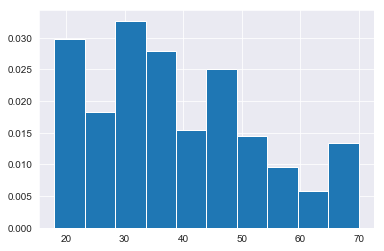

In [17]:
# visualize age
df.Age.hist(density=True);

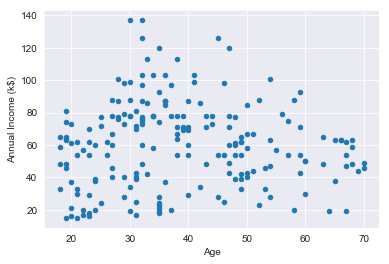

In [18]:
# visualize scatter between features
df.plot(x="Age", y="Annual Income (k$)", kind="scatter");

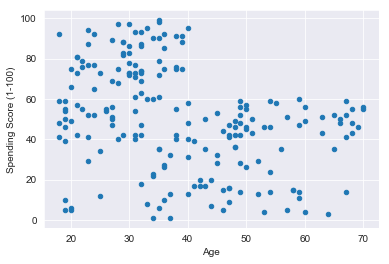

In [19]:
# visualize scatter between features
df.plot(x="Age", y="Spending Score (1-100)", kind="scatter");

In [20]:
# from above plot you can see diff spending scores between age group of less and more 40
# open and explore this point (more than or equal 40)
df_m40 = pd.read_csv('df_m40.csv')
df_m40.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,9,Male,64,19,3
1,11,Male,67,19,14
2,13,Female,58,20,15


In [21]:
# see average spending scores of people age more than or equal 40
df_m40['Spending Score (1-100)'].mean()

36.79761904761905

In [22]:
# open and explore this point (less than 40)
df_l40 = pd.read_csv('df_l40.csv')
df_l40.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [23]:
# see average spending scores of people age less than 40
df_l40['Spending Score (1-100)'].mean()

59.9051724137931

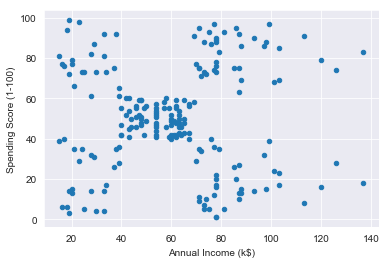

In [24]:
# visualize scatter between features
df.plot(x="Annual Income (k$)", y="Spending Score (1-100)", kind="scatter");
# as you can see if Mall want to drive its sales, they should focus on customers
# who have 60K+ annual income and spending score at 60+ points
# but are there other variables associated? maybe explore more on Age and Genger

**Hypothesis 1** <br>
Is spending score of Female greater than male significantly? <br>
$H0: \mu_f \leq \mu_m \\
H1: \mu_f > \mu_m$  

In [25]:
# find mean of spending score / 100 (total scores point of spending)
mu_null = np.mean(df['Spending Score (1-100)'])
mu_null

50.2

In [26]:
# no. of female customers
n_f = df.query('Gender == "Female"').CustomerID.count()
n_f

112

In [27]:
# no. of male customers
n_m = df.query('Gender == "Male"').CustomerID.count()
n_m

88

In [28]:
# bootsample 10000 times for spending score
diffs = []
for i in range(10000):
    bootsample = df.sample(200, replace=True)
    f_sp = bootsample.query('Gender == "Female"')['Spending Score (1-100)'].mean()
    m_sp = bootsample.query('Gender == "Male"')['Spending Score (1-100)'].mean()
    diffs.append(f_sp - m_sp)

In [29]:
# find actual diff between Female and Male spending
obs_diff = df.query('Gender == "Female"')['Spending Score (1-100)'].mean() - df.query('Gender == "Male"')['Spending Score (1-100)'].mean()
obs_diff

3.015422077922082

In [30]:
# create distribution function for diff values
null_vals = np.random.normal(diffs)

In [31]:
# create lower and upper bound in distribution
low, upp = np.percentile(null_vals, 2.5), np.percentile(null_vals, 97.5)
low, upp

(-4.486158920929299, 10.545714812572983)

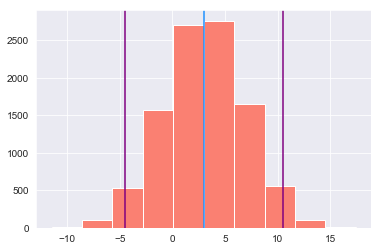

In [32]:
# plot to see the function
plt.hist(null_vals, color='salmon')
plt.axvline(low, color='purple')
plt.axvline(upp, color='purple')
plt.axvline(obs_diff, color='dodgerblue');

In [33]:
# compute p-value
(null_vals > obs_diff).mean()
# therefore, we fail to reject to null hypothesis
# no need to separate email to high annual income, high spending score by gender

0.5039

**Hypothesis 2** <br>
Is spending score of who age equal or older than 40 less than who age less than 40 significantly? <br>
$H0: \mu_{old} \geq \mu_{you} \\
H1: \mu_{old} < \mu_{yo}$  

In [34]:
mu_null = np.mean(df['Spending Score (1-100)'])
mu_null

50.2

In [35]:
# no. of older
n_old = df.query('Age >= 40').CustomerID.count()
n_old

84

In [36]:
# no. of younger
n_you = df.query('Age < 40').CustomerID.count()
n_you

116

In [37]:
# bootsample 10000 times for spending score
diffs = []
for i in range(10000):
    bootsample = df.sample(200, replace=True)
    o_sp = bootsample.query('Age >= 40')['Spending Score (1-100)'].mean()
    y_sp = bootsample.query('Age < 40')['Spending Score (1-100)'].mean()
    diffs.append(o_sp - y_sp)

In [38]:
# find actual diff between Female and Male spending
obs_diff = df.query('Age >= 40')['Spending Score (1-100)'].mean() - df.query('Age < 40')['Spending Score (1-100)'].mean()
obs_diff

-23.107553366174052

In [39]:
# create distribution function for diff values
null_vals = np.random.normal(diffs)

In [40]:
# create lower and upper bound in distribution
low, upp = np.percentile(null_vals, 2.5), np.percentile(null_vals, 97.5)
low, upp

(-29.71657407495097, -16.577364689135834)

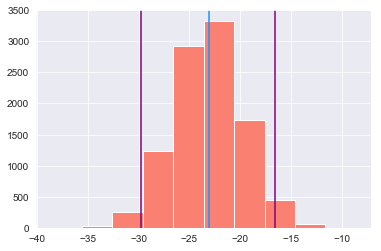

In [41]:
# plot to see the function
plt.hist(null_vals, color='salmon')
plt.axvline(low, color='purple')
plt.axvline(upp, color='purple')
plt.axvline(obs_diff, color='dodgerblue');

In [42]:
# compute p-value
(null_vals < obs_diff).mean()
# therefore, we fail to reject to null hypothesis
# no need to separate email to high annual income, high spending score by age

0.4981

<a id='conclusions'></a>
## <font color='teal'>3) Conclusions</font>

- No linear relationship between Age and Annual income
- Female spending scores aren't higher than Male significantly
- Customers who age less than 40 seem to spend more than the older
- But from hypothesis testing we don't see the significantly different
- In summary, Mall should focus driving sales through who got higher than 60K annually and spending score beyong 60 points
- Because they are potential group that can upscale in selling